# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

In [ ]:
geo_data_0 = pd.read_csv('/datasets/geo_data_0.csv')

In [ ]:
geo_data_1 = pd.read_csv('/datasets/geo_data_1.csv')

In [ ]:
geo_data_2 = pd.read_csv('/datasets/geo_data_2.csv')

In [ ]:
geo_data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [ ]:
geo_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [ ]:
geo_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [ ]:
geo_data_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [ ]:
geo_data_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [ ]:
geo_data_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


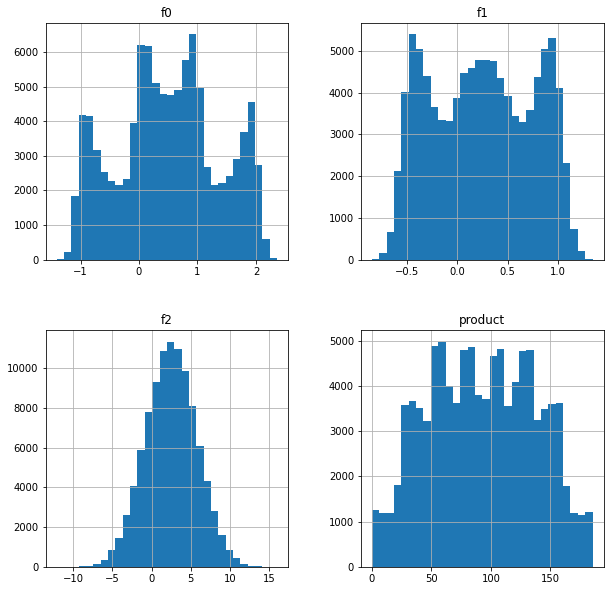

In [ ]:
geo_data_0.hist(figsize=(10,10),bins = 30)
plt.show()

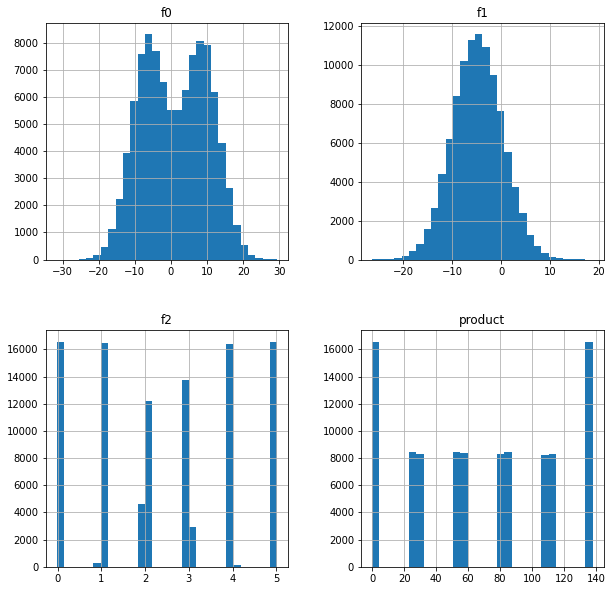

In [ ]:
geo_data_1.hist(figsize=(10,10),bins=30)
plt.show()

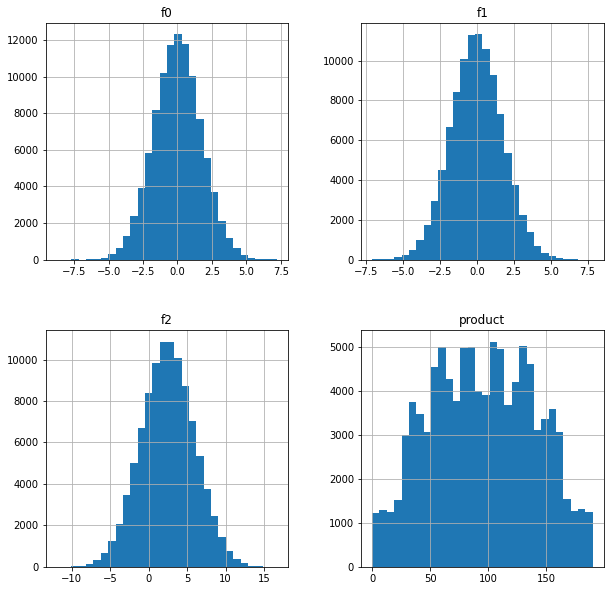

In [ ]:
geo_data_2.hist(figsize=(10,10),bins=30)
plt.show()

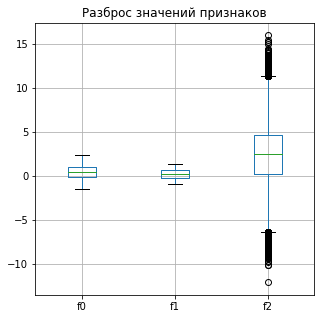

In [ ]:
geo_data_0.boxplot(column=['f0','f1','f2'],figsize=(5,5))
plt.title('Разброс значений признаков')
plt.show()

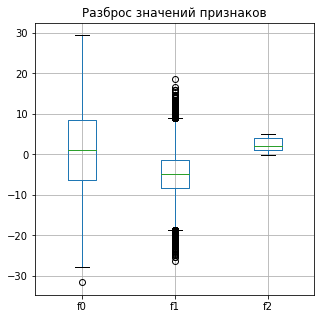

In [ ]:
geo_data_1.boxplot(column=['f0','f1','f2'],figsize=(5,5))
plt.title('Разброс значений признаков')
plt.show()

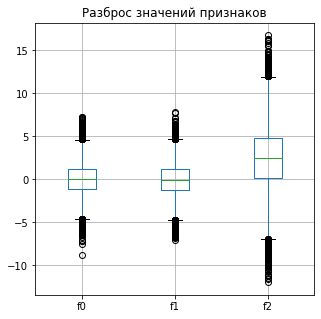

In [ ]:
geo_data_2.boxplot(column=['f0','f1','f2'],figsize=(5,5))
plt.title('Разброс значений признаков')
plt.show()

In [ ]:
geo_data_0.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [ ]:
geo_data_1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [ ]:
geo_data_2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


<AxesSubplot:>

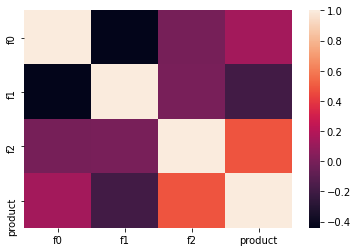

In [ ]:
sns.heatmap(geo_data_0.corr())

<AxesSubplot:>

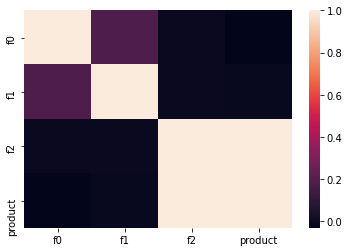

In [ ]:
sns.heatmap(geo_data_1.corr())

<AxesSubplot:>

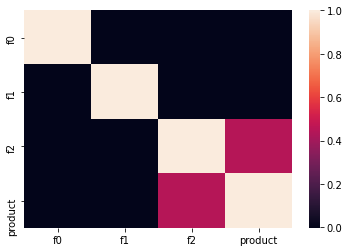

In [ ]:
sns.heatmap(geo_data_2.corr())

In [ ]:
print('Дубликаты записей по скважинам в  0_регионе:',geo_data_0.duplicated('id').sum())
print('Дубликаты записей по скважинам в  1_регионе:',geo_data_1.duplicated('id').sum())
print('Дубликаты записей по скважинам во 2_регионе:',geo_data_2.duplicated('id').sum())

Дубликаты записей по скважинам в  0_регионе: 10
Дубликаты записей по скважинам в  1_регионе: 4
Дубликаты записей по скважинам во 2_регионе: 4


In [ ]:
geo_data_0.shape

(100000, 5)

In [ ]:
geo_data_1.shape

(100000, 5)

In [ ]:
geo_data_2.shape

(100000, 5)

In [ ]:
geo_data_0 = geo_data_0.drop_duplicates('id')
geo_data_0.shape

(99990, 5)

In [ ]:
geo_data_1 = geo_data_1.drop_duplicates('id')
geo_data_1.shape

(99996, 5)

In [ ]:
geo_data_2 = geo_data_2.drop_duplicates('id')
geo_data_2.shape

(99996, 5)

In [ ]:
geo_data_0 = geo_data_0.drop(['id'],axis=1)
geo_data_1 = geo_data_1.drop(['id'],axis=1)
geo_data_2 = geo_data_2.drop(['id'],axis=1)

In [ ]:
#проверим есть ли скважины с "0" продуктивностью
geo_data_00=geo_data_0.loc[geo_data_0['product'] == 0].count()
geo_data_00

f0         1
f1         1
f2         1
product    1
dtype: int64

In [ ]:
#проверим есть ли скважины с "0" продуктивностью
geo_data_01=geo_data_1.loc[geo_data_1['product'] == 0].count()
n=geo_data_01[1]/len(geo_data_1)*100
n

8.235329413176528

In [ ]:
#проверим есть ли скважины с "0" продуктивностью
geo_data_02=geo_data_2.loc[geo_data_2['product'] == 0].count()
geo_data_02

f0         1
f1         1
f2         1
product    1
dtype: int64

**ВЫВОДЫ**  
Для анализа представленно три датафрейма с одинаковым количеством в 100 000 записей. Пропусков в данных не наблюдается. Выявлен ряд дубликатов по ID. В юазу данных попали различные сведения в отношении одной и той же скважины. 10, 4, 4  дубликата по соответствующим регионам 0,1,2. Так как они имеют мизерную долю дубликаты удалим.  
Визуализация данных показывает, что в основном данные имеют нормальное распределение за исключением 1 региона. В регионе geo_data_01 в столбце product 8% не пустых, но нулевых значений. Удалять не будем, это могут быть на самом деле непродуктивные скважины. Согласно тепловой карте самая большая зависимость наблюдается в нулевом регионе между признаком F2 и целевой переменной Product. Между признаками большой корреляции не наблюдается.  
В результате:  
1. Уладили дубликаты по "id" во всех датафреймах.
2. Удалили неважный с точки зрения анализа столбей "id".
3. Между признаками большой корреляции не наблюдается.
4. Название и типы столбцов корректны.

## Обучение и проверка модели

Проведем разделение датафреймов на выборки: обучающую и валидационную.

In [ ]:
df_train_0, df_valid_0 = np.split(geo_data_0.sample(frac=1, random_state=821), [int(.75*len(geo_data_0))])
print(df_train_0.shape)
print(df_valid_0.shape)

(74992, 4)
(24998, 4)


In [ ]:
df_train_1, df_valid_1 = np.split(geo_data_1.sample(frac=1, random_state=821), [int(.75*len(geo_data_1))])
print(df_train_1.shape)
print(df_valid_1.shape)

(74997, 4)
(24999, 4)


In [ ]:
df_train_2, df_valid_2 = np.split(geo_data_2.sample(frac=1, random_state=821), [int(.75*len(geo_data_2))])
print(df_train_2.shape)
print(df_valid_2.shape)

(74997, 4)
(24999, 4)


Стандартизируем наборы данных:

In [ ]:
# scaler = StandardScaler()
# scaler.fit_transform(df_train_0)
# scaler.fit_transform(df_valid_0)
# scaler.fit_transform(df_train_1)
# scaler.fit_transform(df_valid_1)
# scaler.fit_transform(df_train_2)
# scaler.fit_transform(df_valid_2)

In [ ]:
pd.options.mode.chained_assignment = None
numeric = ['f0','f1','f2']
def standart (train,valid):
    scaler = StandardScaler()
    scaler.fit(train[numeric])
    train[numeric] = scaler.transform(train[numeric])
    valid[numeric] = scaler.transform(valid[numeric])
    return train, valid

In [ ]:
df_train_0, df_valid_0 = standart(df_train_0, df_valid_0)
df_train_1, df_valid_1 = standart(df_train_1, df_valid_1)
df_train_2, df_valid_2 = standart(df_train_2, df_valid_2)

Проведем разделение на наборы фичей и целевых переменных.

In [ ]:
features_train_0 = df_train_0.drop(['product'], axis=1)
target_train_0 = df_train_0['product']
features_valid_0 = df_valid_0.drop(['product'], axis=1)
target_valid_0 = df_valid_0['product']

In [ ]:
features_train_1 = df_train_1.drop(['product'], axis=1)
target_train_1 = df_train_1['product']
features_valid_1 = df_valid_1.drop(['product'], axis=1)
target_valid_1 = df_valid_1['product']

In [ ]:
features_train_2 = df_train_2.drop(['product'], axis=1)
target_train_2 = df_train_2['product']
features_valid_2 = df_valid_2.drop(['product'], axis=1)
target_valid_2 = df_valid_2['product']

In [ ]:
features_train_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74997 entries, 25842 to 68393
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f0      74997 non-null  float64
 1   f1      74997 non-null  float64
 2   f2      74997 non-null  float64
dtypes: float64(3)
memory usage: 2.3 MB


In [ ]:
features_valid_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24999 entries, 86952 to 10479
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f0      24999 non-null  float64
 1   f1      24999 non-null  float64
 2   f2      24999 non-null  float64
dtypes: float64(3)
memory usage: 781.2 KB


Обучим моделей линейной регрессии на полученных наборах данных.

In [ ]:
model_0= LinearRegression().fit(features_train_0, target_train_0)
predictions_valid_0 = model_0.predict(features_valid_0)
result_0 = mean_squared_error (target_valid_0, predictions_valid_0)**0.5 #корень из средней квадратичной ошибки
print("RMSE модели линейной регрессии на валидационной выборке:", result_0)
result_mean_0=predictions_valid_0.mean()
print("Средний запас предсказанного сырья скважины 0 региона:", round(result_mean_0), 'тыс. баррелей')

RMSE модели линейной регрессии на валидационной выборке: 37.61204242641594
Средний запас предсказанного сырья скважины 0 региона: 93 тыс. баррелей


In [ ]:
model_1= LinearRegression().fit(features_train_1, target_train_1)
predictions_valid_1 = model_1.predict(features_valid_1)
result_1 = mean_squared_error (target_valid_1, predictions_valid_1)**0.5 #корень из средней квадратичной ошибки
print("RMSE модели линейной регрессии на валидационной выборке:", result_1)
result_mean_1=predictions_valid_1.mean()
print("Средний запас предсказанного сырья скважины 1 региона:", round(result_mean_1), 'тыс. баррелей')

RMSE модели линейной регрессии на валидационной выборке: 0.8885396822220402
Средний запас предсказанного сырья скважины 1 региона: 69 тыс. баррелей


In [ ]:
model_2 = LinearRegression().fit(features_train_2, target_train_2)
predictions_valid_2 = model_2.predict(features_valid_2)
result_2 = mean_squared_error (target_valid_2, predictions_valid_2)**0.5 #корень из средней квадратичной ошибки
print("RMSE модели линейной регрессии на валидационной выборке:", result_2)
result_mean_2=predictions_valid_2.mean()
print("Средний запас предсказанного сырья скважины 2 региона:", round(result_mean_2), 'тыс. баррелей')

RMSE модели линейной регрессии на валидационной выборке: 39.99364878000945
Средний запас предсказанного сырья скважины 2 региона: 95 тыс. баррелей


**ВЫВОДЫ**  
Для оценки того, насколько хорошо регрессионная модель соответствует набору данных, вычисляли среднеквадратичную ошибку , которая представляет собой показатель, указывающий нам среднее расстояние между прогнозируемыми значениями из модели и фактическими значениями в наборе данных.

Чем ниже RMSE, тем лучше данная модель может «соответствовать» набору данных.
По результатам полученных RMSE на валидационных выборках наименьшее среднеквадратичная ошибка выявленв в 1 регионе. При этом в этом же регионе наблюдается самый низкий предсказанный средний запас сырья. Такой результат может быть получен в связи с наличием более 8 тыс. записей по скважинам с нулевым значением прдуктивности. Максимальный предсказанный объем сырья определен для 2 региона.

## Подготовка к расчёту прибыли

Установим основные исходные данные для расчета прибыли

In [ ]:
BUDGET = 10_000_000 #бюджет на разработку скважин в регионе в тыс.рублей
N_STUDY = 500 #количество исследуемых скважин
N_BESRT = 200 #количество лучших скважин, выбранных с помощью машинного обучения
BARREL_PRICE_PROFIT = 450 #тыс. рублей - доход с каждой единицы продукта

In [ ]:
barrel=BUDGET/BARREL_PRICE_PROFIT/N_BESRT
print("Достаточный объем сырья для новой скважины при условии безубыточности:", round(barrel), 'тыс. баррелей')

Достаточный объем сырья для новой скважины при условии безубыточности: 111 тыс. баррелей


**ВЫВОДЫ**  
Достаточный объем сырья для новой скважины при условии безубыточности составляем 111 тыс. баррелей.  
Средний запас предсказанного сырья в любом регионе меньше достаточного объема сырья для новой скважины, чтобы соответствовать условию безубыточности: в нулевом региона на 18,0 тыс. баррелей, в первом регионе - 42 тыс. баррелей, во втором регионе - 16,0 тыс. баррелей.

## Расчёт прибыли и рисков

In [ ]:
#функция расчета прибыли по выбранным скважинам и предсказаниям модели
def revenue(proba, count, price, invest):
    probs_sorted = proba.sort_values(ascending=False)
    selected = probs_sorted[:count]
    return price*selected.sum()-invest

In [ ]:
#Преобразуем предсказания в Series для дальнейшего использования
predict_0 = pd.Series(np.asarray(predictions_valid_0), index=target_valid_0.index)
predict_1 = pd.Series(np.asarray(predictions_valid_1), index=target_valid_1.index)
predict_2 = pd.Series(np.asarray(predictions_valid_2), index=target_valid_2.index)

In [ ]:
#Рассчитаем прибыль по скважинам с максимальным значениями предсказаний по объему сырья
print("Прибыль в {}  регионе по предсказанным моделью 200 скважинам c max значениями составляет {} тыс.рублей".
      format('0', revenue(predict_0, N_BESRT, BARREL_PRICE_PROFIT, BUDGET)))
print("Прибыль в {}  регионе по предсказанным моделью 200 скважинам c max значениями составляет {} тыс.рублей".
      format('1', revenue(predict_1, N_BESRT, BARREL_PRICE_PROFIT, BUDGET)))
print("Прибыль во {}  регионе по предсказанным моделью 200 скважинам c max значениями составляет {} тыс.рублей".
      format('2', revenue(predict_2, N_BESRT, BARREL_PRICE_PROFIT, BUDGET)))

Прибыль в 0  регионе по предсказанным моделью 200 скважинам c max значениями составляет 3969013.9069279134 тыс.рублей
Прибыль в 1  регионе по предсказанным моделью 200 скважинам c max значениями составляет 2488362.6998614483 тыс.рублей
Прибыль во 2  регионе по предсказанным моделью 200 скважинам c max значениями составляет 3426813.317162564 тыс.рублей


**По скважинам с максимально предсказанными объемами сырья прибыльным определеяемся нулевой регион с прибылью в 3969,0 млн рублей.  На втором месте второй регион с прибылью 3426,8 млн рублей.**

Посчитаем риски и прибыль для каждого региона. Применим технику Bootstrap c 1000 выборками.

In [ ]:
# функция по подсчету прибыли в случайной выборки
def revenue_(target, proba, count, price, invest):
    probs_sorted = proba.sort_values(ascending=False)
    selected = target[probs_sorted.index][:count]
    return price*selected.sum()-invest

In [ ]:
# функция применения техники Bootstrap
def prognos(target,predict):
    state = np.random.RandomState(12345)
    values = []
    for i in range(1000):
        target_subsample = target.sample(N_STUDY, replace=True, random_state=state)
        probs_subsample = predict[target_subsample.index]
        values.append(revenue_(target_subsample, probs_subsample, N_BESRT, BARREL_PRICE_PROFIT, BUDGET))
    values = pd.Series(values)
    mean = values.mean()
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    risk = values[values<0].count()/len(values)*100
    return mean,lower,upper,risk

In [ ]:
mean,lower,upper,risk = prognos(target_valid_0,predict_0)

print("Средняя прибыль в {}  регионе составляет {}  млн рублей".format('0',round(mean)/1000))
print("Доверительный интервал в {}  регионе составляет от {} до {} млн рублей".format('0',round(lower)/1000, round(upper)/1000))
print("Риск убытка в {} регионе составляет {} %".format('0',round(risk)))

Средняя прибыль в 0  регионе составляет 487.003  млн рублей
Доверительный интервал в 0  регионе составляет от -7.275 до 975.276 млн рублей
Риск убытка в 0 регионе составляет 3 %


In [ ]:
mean,lower,upper,risk = prognos(target_valid_1,predict_1)

print("Средняя прибыль в {}  регионе составляет {}  млн рублей".format('1',round(mean)/1000))
print("Доверительный интервал в {}  регионе составляет от {} до {} млн рублей".format('1',round(lower)/1000, round(upper)/1000))
print("Риск убытка в {} регионе составляет {} %".format('1',round(risk)))

Средняя прибыль в 1  регионе составляет 500.589  млн рублей
Доверительный интервал в 1  регионе составляет от 91.425 до 950.049 млн рублей
Риск убытка в 1 регионе составляет 1 %


In [ ]:
mean,lower,upper,risk = prognos(target_valid_2,predict_2)

print("Средняя прибыль в {}  регионе составляет {}  млн рублей".format('2',round(mean)/1000))
print("Доверительный интервал в {}  регионе составляет от {} до {} млн рублей".format('2',round(lower)/1000, round(upper)/1000))
print("Риск убытка в {} регионе составляет {} %".format('2',round(risk)))

Средняя прибыль в 2  регионе составляет 412.042  млн рублей
Доверительный интервал в 2  регионе составляет от -133.614 до 958.836 млн рублей
Риск убытка в 2 регионе составляет 7 %


**ВЫВОДЫ  
Оценив риски, для разработки месторождений предлагается выбрать первый регион, у которого (если верить технике Bootstrap) самый маленький риск убытков - 1 процент, что соответствует условию задачи. А также самая высокая средняя прибыль: в сумме около 500 млн. рублей и самый маленький доверительный интервал.**